 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
from matplotlib import pyplot as plt
from matplotlib import style
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_returns_csv = Path("whale_returns.csv")

whale_returns = pd.read_csv(whale_returns_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)

whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
whale_returns.dropna(inplace = True)

whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
algo_returns_csv = Path("algo_returns.csv")

algo_returns = pd.read_csv(algo_returns_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)

In [6]:
# Count nulls
algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
algo_returns.dropna(inplace = True)

algo_returns.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P 500 Closing Prices
sp500_history_csv = Path("sp500_history.csv")

sp500_hist = pd.read_csv(sp500_history_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)

sp500_hist.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [9]:
# Check Data Types
sp500_hist.dtypes

Close    object
dtype: object

In [10]:
# Fix Data Types
sp500_hist = sp500_hist["Close"].str.replace('$', '')

In [11]:
sp500_hist = sp500_hist.astype("float")
sp500_hist.dtypes

dtype('float64')

In [12]:
# Calculate Daily Returns
sp500_returns = sp500_hist.pct_change()

sp500_returns.head()

Date
2019-04-23         NaN
2019-04-22   -0.008764
2019-04-18   -0.001011
2019-04-17   -0.001577
2019-04-16    0.002279
Name: Close, dtype: float64

In [13]:
# Drop nulls
sp500_returns.dropna(inplace = True)

sp500_returns.head()

Date
2019-04-22   -0.008764
2019-04-18   -0.001011
2019-04-17   -0.001577
2019-04-16    0.002279
2019-04-15   -0.000509
Name: Close, dtype: float64

In [14]:
# Rename Column
sp500_hist.tail()

#create dictionary

Date
2012-10-05    1460.93
2012-10-04    1461.40
2012-10-03    1450.99
2012-10-02    1445.75
2012-10-01    1444.49
Name: Close, dtype: float64

## Combine Whale, Algorithmic, and S&P 500 Returns

In [15]:
# Concatenate all DataFrames into a single DataFrame
whale_returns_csv = Path("whale_returns.csv")
whale_returns = pd.read_csv(whale_returns_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
whale_returns = whale_returns.dropna()

algo_returns_csv = Path("algo_returns.csv")
algo_returns = pd.read_csv(algo_returns_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)

sp500_history_csv = Path("sp500_history.csv")
sp500_hist = pd.read_csv(sp500_history_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)

cost_historical_csv = Path("cost_historical.csv")
cost_hist = pd.read_csv(cost_historical_csv, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)

qooq_historical_csv = Path("qooq_historical.csv")
qooq_hist = pd.read_csv(cost_historical_csv, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)

aapl_historical_csv = Path("aapl_historical.csv")
aapl_hist = pd.read_csv(aapl_historical_csv, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)

---

In [16]:
master_df = pd.concat([whale_returns, algo_returns, sp500_returns], axis="columns", join="inner")

master_df.sort_index(inplace=True)


master_df.columns = ["SOROS FUND MANAGEMENT LLC", "PAULSON & CO.INC", "TIGER GLOBAL MANAGEMENT LLC", "BERKSHIRE HATHAWAY INC", "Algo 1", "Algo 2", "S&P 500"]

master_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. 

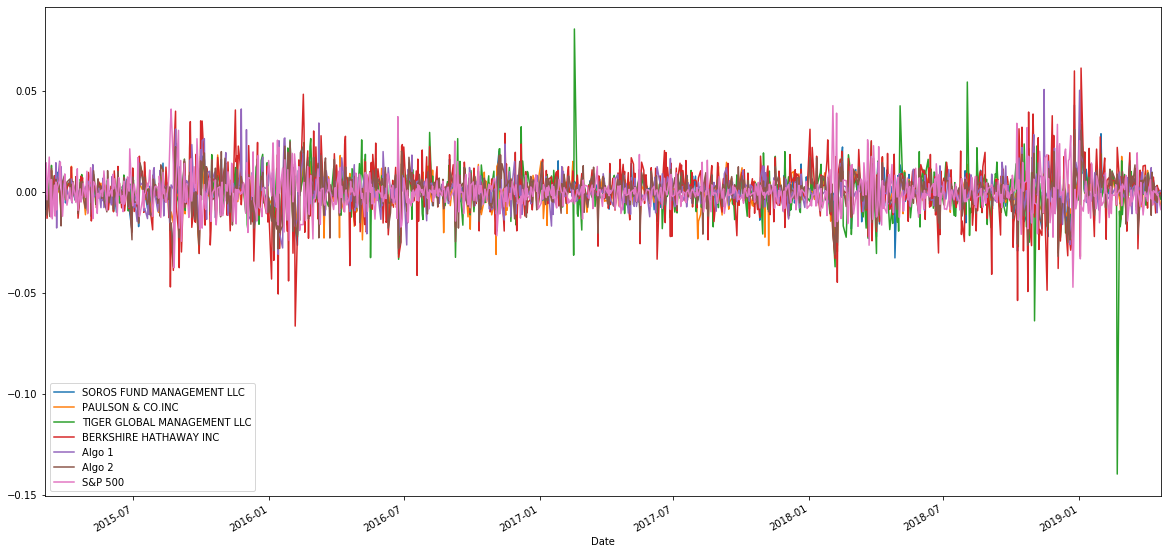

In [17]:
# Plot daily returns
master_df.plot(figsize=(20,10))

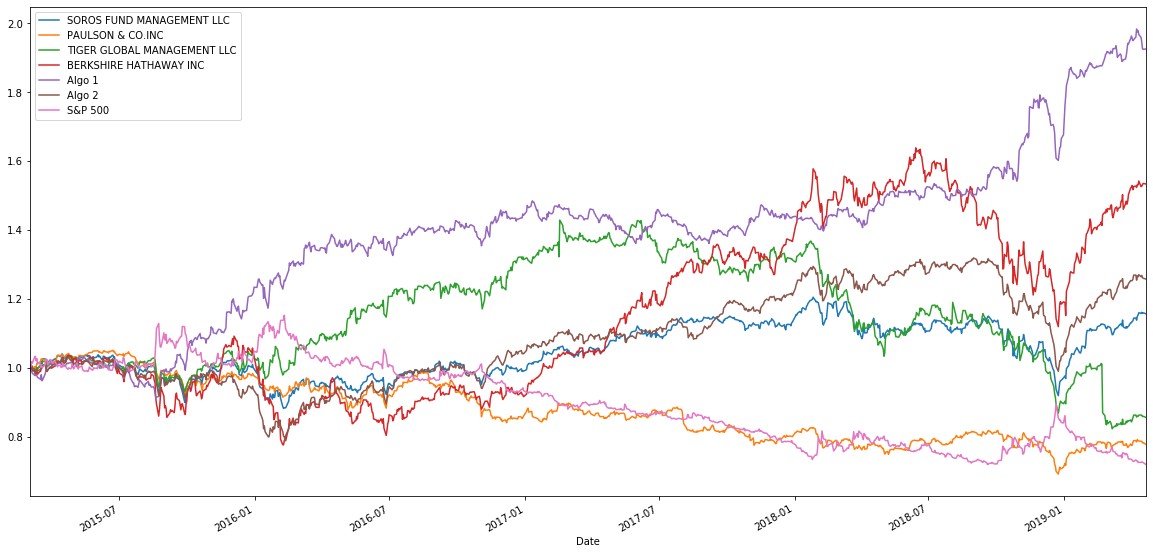

In [18]:
# Plot cumulative returns
cumlative_returns = (1 + master_df).cumprod()

cumlative_returns.plot(figsize=(20,10))

---

## Performance by Month and Year

Analyze the performance by Month and Year:

1. Calculate the Annual Returns
2. Sort the 2017 portfolio returns in descending order to determine the best portfolios for 2017
3. Calculate the Monthly Returns
4. Sort in descending order, the porfolio returns for December 2018

In [19]:
master_df = master_df.dropna()

master_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


In [20]:
# Returns by Year


In [21]:
# Top Portfolio returns for 2017
# YOUR CODE HERE

In [22]:
# Returns by Month
# YOUR CODE HERE

In [23]:
# Top Portfolio Returns for December 2018
# YOUR CODE HERE

---

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

In [24]:
# Box plot to visually show risk
# YOUR CODE HERE

In [25]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. Which portfolios are riskier than the S&P 500?
# YOUR CODE HERE

In [26]:
# Determine which portfolios are riskier than the S&P 500
# YOUR CODE HERE

In [27]:
# Calculate the annualized standard deviation (252 trading days)
# YOUR CODE HERE

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&PP 500 using a 21 day window
2. Calcualte the correlation between each stock to determine which portfolios may mimick the S&P 500
2. Calculate and plot a 60 day Beta for Berkshire Hathaway Inc compared to the S&&P 500

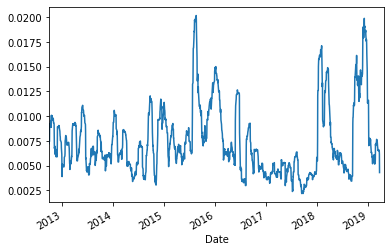

In [28]:
# Calculate and plot the rolling standard deviation for the S&PP 500 using a 21 day window
sp500_returns.rolling(window=21).std().plot()

# Correlation
master_correlation = master_df.corr()
master_correlation.head()

In [29]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
berk_hath_cov = master_df["BERKSHIRE HATHAWAY INC"].cov(master_df["S&P 500"])

berk_hath_var = master_df["S&P 500"].var()

berk_hath_beta = berk_hath_cov / berk_hath_var

berk_hath_beta

-0.020846489408902668

### Challenge: Exponentially Weighted Average 

An alternative way to calculate a rollwing window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the `ewm` with a 21 day half-life.

In [30]:
# (OPTIONAL) YOUR CODE HERE

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

Calculate and plot the annualized Sharpe ratios for all portfolios to determine which portfolio has the best performance

In [31]:
# Annualzied Sharpe Ratios
master_std = master_df.std()

master_sharp = (master_df.mean() * 252) / (master_std * np.sqrt(252))

master_sharp.head()

SOROS FUND MANAGEMENT LLC      0.342894
PAULSON & CO.INC              -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
BERKSHIRE HATHAWAY INC         0.606743
Algo 1                         1.369589
dtype: float64

 plot() these sharpe ratios using a barplot.
 On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales?

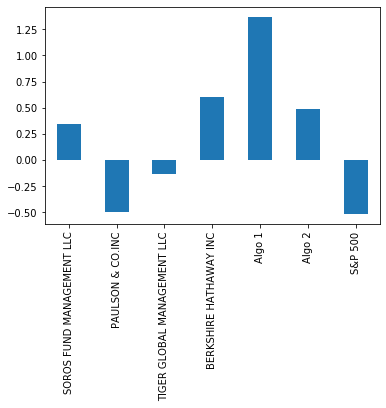

In [32]:
# Visualize the sharpe ratios as a bar plot
master_sharp.plot('bar')

---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [33]:
# Read the first stock
tsla_data = Path ("TSLAHistorical.csv")

tsla_df = pd.read_csv(tsla_data, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)

tsla_df.head()

,Symbol,NOCP
Trade DATE,,
2019-08-22,TSLA,222.15
2019-08-21,TSLA,220.83
2019-08-20,TSLA,225.86
2019-08-19,TSLA,226.83
2019-08-16,TSLA,219.94


In [34]:
# Read the second stock
micro_data = Path ("MSFTHistorical.csv")

micro_df = pd.read_csv(micro_data, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)

micro_df.head()

,Symbol,NOCP
Trade DATE,,
2019-08-22,MSFT,137.78
2019-08-21,MSFT,138.79
2019-08-20,MSFT,137.26
2019-08-19,MSFT,138.41
2019-08-16,MSFT,136.13


In [35]:
# Read the third stock
qcom_data = Path ("QCOMHistorical.csv")

qcom_df = pd.read_csv(qcom_data, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)

qcom_df.head()

,Symbol,NOCP
Trade DATE,,
2019-08-22,QCOM,77.15
2019-08-21,QCOM,76.70
2019-08-20,QCOM,76.07
2019-08-19,QCOM,74.87
2019-08-16,QCOM,73.28


In [36]:
# Concatenate all stocks into a single DataFrame
big_3 = pd.concat([qcom_df, tsla_df, micro_df], axis="columns", join="inner")

big_3.head()

,Symbol,NOCP,Symbol,NOCP,Symbol,NOCP
Trade DATE,,,,,,
2019-08-22,QCOM,77.15,TSLA,222.15,MSFT,137.78
2019-08-21,QCOM,76.70,TSLA,220.83,MSFT,138.79
2019-08-20,QCOM,76.07,TSLA,225.86,MSFT,137.26
2019-08-19,QCOM,74.87,TSLA,226.83,MSFT,138.41
2019-08-16,QCOM,73.28,TSLA,219.94,MSFT,136.13


In [37]:
# Reset the index
big_3.reset_index().head()

,Trade DATE,Symbol,NOCP,Symbol,NOCP,Symbol,NOCP
0,2019-08-22,QCOM,77.15,TSLA,222.15,MSFT,137.78
1,2019-08-21,QCOM,76.70,TSLA,220.83,MSFT,138.79
2,2019-08-20,QCOM,76.07,TSLA,225.86,MSFT,137.26
3,2019-08-19,QCOM,74.87,TSLA,226.83,MSFT,138.41
4,2019-08-16,QCOM,73.28,TSLA,219.94,MSFT,136.13


In [38]:
# Pivot the Data so that the stock tickers are the columns, the dates are the index, and the 
# values are the closing prices
big_3.set_index_col ="Trade DATE"

big_3.drop('Symbol', axis=1, inplace=True)

big_3.columns = ["QCOM", "TSLA", "MSFT"]

big_3.head()

,QCOM,TSLA,MSFT
Trade DATE,,,
2019-08-22,77.15,222.15,137.78
2019-08-21,76.70,220.83,138.79
2019-08-20,76.07,225.86,137.26
2019-08-19,74.87,226.83,138.41
2019-08-16,73.28,219.94,136.13


In [39]:
# Drop Nulls
big_3.dropna().head()

,QCOM,TSLA,MSFT
Trade DATE,,,
2019-08-22,77.15,222.15,137.78
2019-08-21,76.70,220.83,138.79
2019-08-20,76.07,225.86,137.26
2019-08-19,74.87,226.83,138.41
2019-08-16,73.28,219.94,136.13


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [40]:
# Calculate weighted portfolio returns
weights = [1/3, 1/3, 1/3]

big_3 = big_3.pct_change()

big_3_weighted = big_3.dot(weights)

big_3_weighted.dropna().head()


Trade DATE
2019-08-21   -0.001481
2019-08-20    0.001180
2019-08-19   -0.001034
2019-08-16   -0.022695
2019-08-15   -0.022159
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [89]:
master_correlation = pd.concat([master_df, big_3_weighted], axis="columns", join="inner")
master_correlation.columns.values[7] = "TMC"
master_correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,TMC
2018-08-24,0.006674,0.004229,0.004691,0.012350,0.000648,0.002828,-0.007612,-0.000884
2018-08-27,0.005238,0.001996,0.008639,0.019590,-0.000678,0.001447,-0.000269,-0.005731
2018-08-28,0.000646,0.001236,-0.006537,-0.005677,-0.004257,0.000831,-0.005669,0.005043
2018-08-29,0.003578,0.002776,0.006234,0.001879,-0.002434,0.003543,0.004450,0.007439
2018-08-30,-0.007328,-0.001927,-0.016174,-0.013139,-0.002636,-0.001224,-0.000134,-0.002246
2018-08-31,0.003072,0.000752,0.003118,-0.000410,0.004277,0.004151,0.001657,0.010463
2018-09-04,-0.001579,-0.004159,-0.017688,-0.014065,-0.000860,-0.002850,0.002811,0.015363
2018-09-05,-0.006677,-0.001899,0.000307,-0.040847,0.008809,-0.003619,0.003666,0.001495
2018-09-06,-0.008370,-0.004373,-0.002911,-0.003522,0.005272,-0.006841,0.002218,0.023964
2018-09-07,0.002157,-0.000862,-0.003003,0.002303,-0.002163,-0.001500,-0.001894,-0.038497


## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

In [42]:
# Risk
master_volatility = master_correlation.std()*np.sqrt(252)
master_volatility.sort_values(inplace=True)
master_volatility

PAULSON & CO.INC               0.130565
Algo 1                         0.153143
Algo 2                         0.156749
SOROS FUND MANAGEMENT LLC      0.165263
S&P 500                        0.173906
TIGER GLOBAL MANAGEMENT LLC    0.256347
BERKSHIRE HATHAWAY INC         0.276896
0                              0.309349
dtype: float64

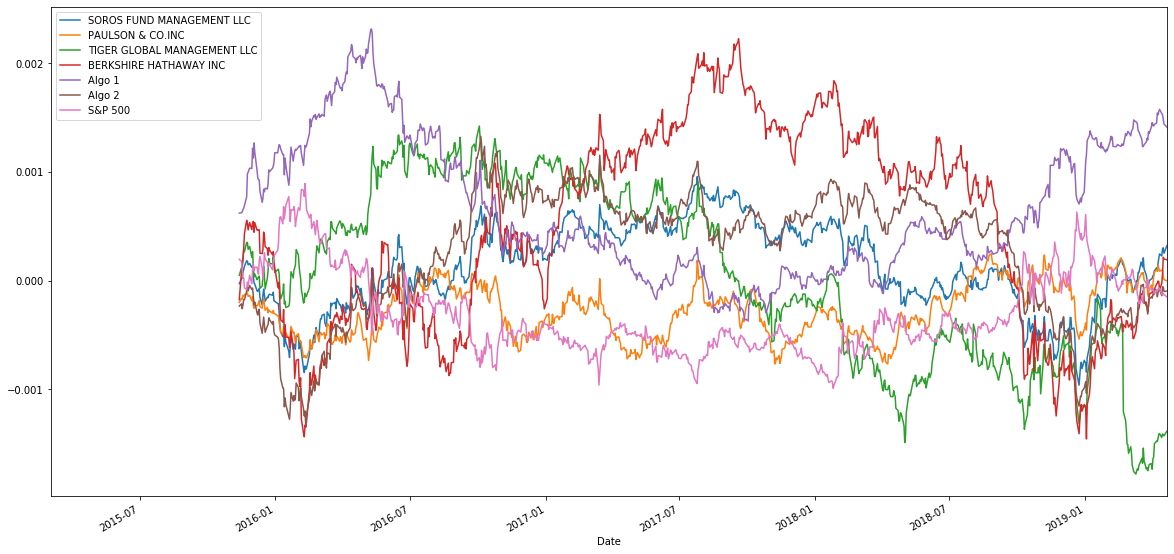

In [73]:
# Rolling
rolling = master_df.sort_index(ascending=True).rolling(window=180).mean()
rolling.plot(figsize=(20,10))

In [66]:
# Beta


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.786552,0.406530,0.460955,0.332414,0.782620,0.000528
PAULSON & CO.INC,0.622657,1.000000,0.279999,0.296629,0.247586,0.571126,0.011085
TIGER GLOBAL MANAGEMENT LLC,0.774276,0.673657,1.000000,0.357760,0.234616,0.662574,-0.001910
BERKSHIRE HATHAWAY INC,1.233857,1.002994,0.502800,1.000000,0.494329,1.065183,-0.020846
Algo 1,0.309786,0.291465,0.114798,0.172104,1.000000,0.263055,-0.030149
Algo 2,0.873326,0.805075,0.388201,0.444062,0.314986,1.000000,-0.002129
S&P 500,0.000624,0.016560,-0.001186,-0.009210,-0.038259,-0.002256,1.000000


In [75]:
# Annualzied Sharpe Ratio
all_portfolio_std = master_df.std()
all_portfolio_std.head

sharp_ratios = (master_df.mean() * 252) / (all_portfolio_std * np.sqrt(252))
sharp_ratios

SOROS FUND MANAGEMENT LLC      0.342894
PAULSON & CO.INC              -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
BERKSHIRE HATHAWAY INC         0.606743
Algo 1                         1.369589
Algo 2                         0.484334
S&P 500                       -0.518582
dtype: float64

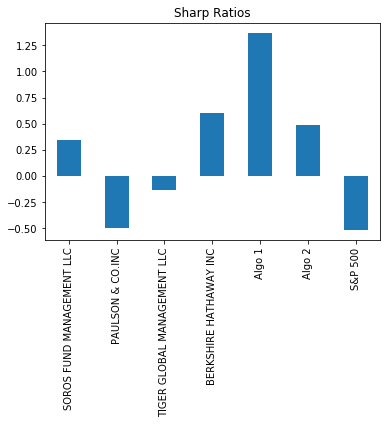

In [71]:
# Visualize the sharpe ratios as a bar plot
sharp_ratios.plot.bar(title = "Sharp Ratios")

## Include correlation analysis to determine which stocks (if any) are correlated

In [67]:
master_covar = master_df.cov()
master_var = master_df.var()
master_df_beta = master_covar / master_var 

master_df_beta

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.786552,0.406530,0.460955,0.332414,0.782620,0.000528
PAULSON & CO.INC,0.622657,1.000000,0.279999,0.296629,0.247586,0.571126,0.011085
TIGER GLOBAL MANAGEMENT LLC,0.774276,0.673657,1.000000,0.357760,0.234616,0.662574,-0.001910
BERKSHIRE HATHAWAY INC,1.233857,1.002994,0.502800,1.000000,0.494329,1.065183,-0.020846
Algo 1,0.309786,0.291465,0.114798,0.172104,1.000000,0.263055,-0.030149
Algo 2,0.873326,0.805075,0.388201,0.444062,0.314986,1.000000,-0.002129
S&P 500,0.000624,0.016560,-0.001186,-0.009210,-0.038259,-0.002256,1.000000
